- Name: Basma Elhoseny
- Sec: 1
- BN:16
- Code: 9202381

In [365]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import math
import sys

In [334]:
# load the dataset using pandas
df = pd.read_excel("Concrete_Data.xlsx")

In [335]:
# split the data frame into a training and testing splits with a 70% / 30% ratio
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42) # Random is fixed for reproducibility

In [336]:
df_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
196,194.68,0.0,100.52,165.62,7.48,1006.4,905.90,28,25.724350
631,325.00,0.0,0.00,184.00,0.00,1063.0,783.00,7,17.540269
81,318.80,212.5,0.00,155.70,14.30,852.1,880.40,3,25.200348
526,359.00,19.0,141.00,154.00,10.91,942.0,801.00,3,23.639177
830,162.00,190.0,148.00,179.00,19.00,838.0,741.00,28,33.756745
...,...,...,...,...,...,...,...,...,...
87,286.30,200.9,0.00,144.70,11.20,1004.6,803.70,3,24.400556
330,246.83,0.0,125.08,143.30,11.99,1086.8,800.89,14,42.216615
466,190.34,0.0,125.18,166.61,9.88,1079.0,798.90,100,33.563692
121,475.00,118.8,0.00,181.10,8.90,852.1,781.50,28,68.299493


In [337]:
df_train.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,284.409681,74.971886,52.006588,181.805576,6.125337,973.798128,771.636297,46.049931,36.152573
std,108.361334,87.717335,63.707358,21.159956,6.046367,78.509208,80.125492,61.650743,16.803402
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.000000,0.000000,0.000000,165.620000,0.000000,932.000000,724.300000,14.000000,23.890343
50%,277.000000,22.000000,0.000000,185.700000,6.000000,968.000000,778.450000,28.000000,35.076402
75%,362.600000,145.000000,117.540000,192.000000,10.100000,1040.000000,821.000000,56.000000,46.247292
max,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [338]:
# extract the models input and targets from both the training and testing dataframes
def extract_Xy(df):
    df_numpy = df.to_numpy()
    return df_numpy[:, :-1], df_numpy[:, -1]

X_train, y_train = extract_Xy(df_train)
X_test, y_test = extract_Xy(df_test)

y_median = np.median(y_train)
print("Median value of the target:", y_median)

# Since we will treat this as a classification task, we will assume that
# the concrete is "strong" (y = True) if its compressive ratio is higher than the median
# otherwise, it is assumed to be "weak" (y = False)
y_train = y_train > y_median
y_test = y_test > y_median

# Now ~50% of the samples should be considered "strong" and the rest are considered "weak"
print(f"Percentage of 'strong' samples: {y_train.mean() * 100} %")

# Also, lets standardize the data since it improves the training process [Z-Score Normalization]
# Adding a small constant (like 1e−8) to the denominator helps avoid division by zero if a feature has zero standard deviation.
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean)/(1e-8 + X_std)
X_test = (X_test - X_mean)/(1e-8 + X_std)

Median value of the target: 35.076402024
Percentage of 'strong' samples: 49.930651872399444 %


## Bagging from Scratch

In [339]:
class GenericBagging:

    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []
        self.initialize_estimators()

        self.x_not_trained_estimator=None
        
    def initialize_estimators(self):
        # initialize the given number of estimators
        for _ in range(self.n_estimators):  # [check] added range
            # Don't change the decision tree parameters [maximum depth of the decision tree 5]
            self.estimators.append(DecisionTreeClassifier(max_depth=5, random_state=0))

    def generate_data_subset(self,len_X):
        # TODO: Generate bootstrap samples (with replacement)
        # Use a subset size of 300 samples
        subset_size=300

        # Randomly select indices with replacement [replace=True]
        indices = np.random.choice(len_X, size=subset_size, replace=True)

        return indices
    
    def fit(self, X, Y):
        # TODO: loop over each classifier and fit on random data subset
        # initialize x_trained_estimator  by same size of train set
        # Initialize x_not_trained_estimator as a NumPy array of shape (n_estimators,len(X)) filled with True
        self.x_not_trained_estimator = np.full((self.n_estimators,len(X)), True)

        # Each estimator
        for i in range(self.n_estimators):
            # Get Random Data Set
            rand_indices = self.generate_data_subset(len(X))


            # Get Train Data Di
            X_rand = X[rand_indices]
            Y_rand = Y[rand_indices]

            # Fit Model on the Random DataSet
            self.estimators[i].fit(X_rand,Y_rand)

            # Add Model(i) to have been trained of X_rand
            self.x_not_trained_estimator[i,rand_indices]=False

        return 

    def predict(self, X):
        # TODO: implement prediction function using majority vote

        # Array of voting result [Init is zeros]
        y_pred_voting=np.zeros(np.shape(X)[0])

        for i in range(self.n_estimators):
            # Predict using estimator of i
            y_pred_i=self.estimators[i].predict(X)

            # Convert to int
            y_pred_i=y_pred_i*1

            # Convert 0 -> -1
            y_pred_i[y_pred_i==0]=-1

            # Add estimator predicts to y_pred_voting
            y_pred_voting+=y_pred_i

        # Take Sign of voting , if zero then tie so assumption to be +ve[True]
        y_pred_voting= (y_pred_voting>=0)
        return y_pred_voting
    
    def calculate_oob_error(self, X, Y):
        # TODO: calculate Out-of-Bag error
        # The out-of-bag (OOB) error is the average error for each training observation
        # calculated using predictions from the trees that do not contain this training observation
        # in their respective bootstrap sample. 

        # Array of voting result [Init is zeros]
        y_pred_voting=np.zeros(np.shape(X)[0])

        # For each estimator
        for i in range(self.n_estimators):
            not_trained_indices=self.x_not_trained_estimator[i]

            # print(len(not_trained_indices))
            X_not_trained=X[not_trained_indices]
            # print(len(X_not_trained))
            y_not_trained=self.estimators[i].predict(X_not_trained)
            
            # Convert to int
            y_not_trained=y_not_trained*1

            # Convert 0 -> -1
            y_not_trained[y_not_trained==0]=-1


            # Add estimator predicts to y_pred_voting
            y_pred_voting[not_trained_indices]+=y_not_trained

        # Take Sign of voting , if zero then tie so assumption to be +ve[True]
        y_pred_voting= (y_pred_voting>=0)


        # We have Train data as validation sey for the estimators not trained on them :D
        # Compute Error as mean of loss (h~(x),y)
        error=np.sum(y_pred_voting!=Y) / len(X)
        return error

In [340]:
def get_scores(n_estimators):
    # run model bagging and compute OOB error and test accuracy
    model = GenericBagging(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_test_predict = model.predict(X_test)
    return model.calculate_oob_error(X_train, y_train), accuracy_score(y_test, y_test_predict)

In [341]:
def draw(n_estimators_options, oob_errors, test_accuracies):
    # Create a figure and axis object with two subplots (1 row, 2 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot oob_errors [Out of Bag Error] as a line in the first subplot
    ax1.plot(n_estimators_options, oob_errors, label='Out Of Bag Error', color='blue')
    ax1.set_xlabel('n_estimators')
    ax1.set_ylabel('Out of Bag Error')
    ax1.legend()

    # Plot test_accuracies as a line in the second subplot
    ax2.plot(n_estimators_options, test_accuracies, label='Test Accuracy', color='red')
    ax2.set_xlabel('n_estimators')
    ax2.set_ylabel('Test Accuracy')
    ax2.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

In [347]:
def run_bagging():
    n_estimators_options = [5, 10, 50, 100, 200, 500]
    # n_estimators_options = [5]
    oob_errors = []
    test_accuracies = []
    for n_estimators in n_estimators_options:
        # Trying Different no of estimators (for each n_estimators)
        oob_error, test_accuracy = get_scores(n_estimators)
        oob_errors.append(oob_error)
        test_accuracies.append(test_accuracy)
    print(oob_errors)
    print(test_accuracies)

    draw(n_estimators_options,oob_errors,test_accuracies)
    # TODO: plot the output scores against n_estimators

[0.17614424410540916, 0.15117891816920942, 0.1262135922330097, 0.12482662968099861, 0.1289875173370319, 0.11789181692094314]
[0.8576051779935275, 0.8770226537216829, 0.8867313915857605, 0.8867313915857605, 0.8996763754045307, 0.8932038834951457]


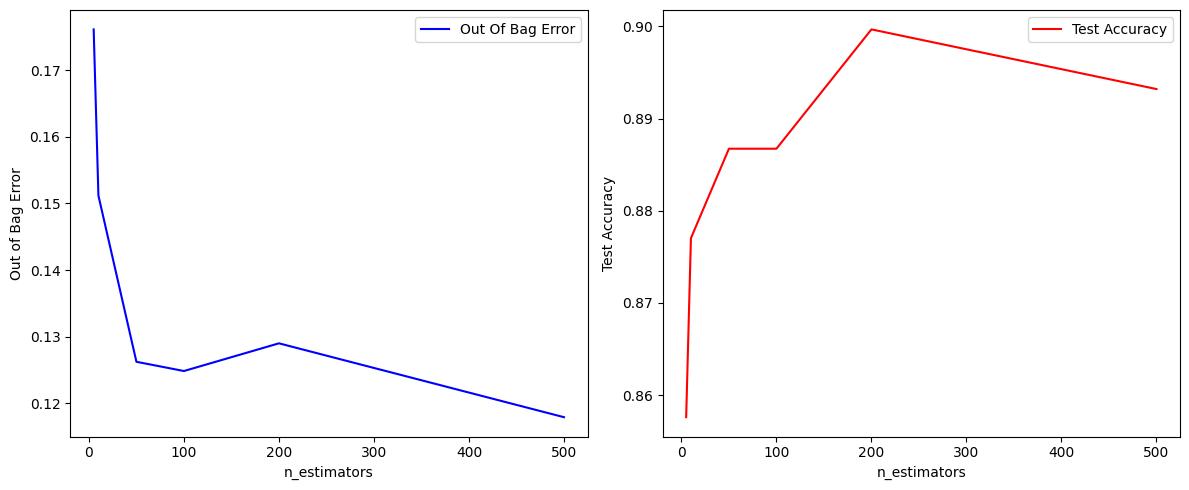

In [348]:
run_bagging()

##### Insights

It is Clear that:
- As no of estimators increases the out of bag error decreases as no of estimators increase
- a very slight increase about 0.001 just due to Random initialization for the Decision tree classifier
- As no of estimators increases the test accuracy increases as no of estimators increase
- a very slight gradual decrease in the test accuracy decreases after 200 0.9 to 0.895 due to random init of Decision Tree which can be neglected 😊

## AdaBoost from Scratch

In [480]:
class GenericBoosting:

    def __init__(self, n_estimators):
        self.n_estimators = n_estimators

    def create_estimator(self):
        # create a decision stump as a weak estimator
        return DecisionTreeClassifier(max_depth=1, random_state=0)

    def fit_and_predict(self, X_train, Y_train, X_test, Y_test):
        # apply AdaBoost on weak estimators
        
        ## initialize the training and test data with empty array placeholders
        pred_train = np.empty((self.n_estimators, X_train.shape[0]))
        pred_test = np.empty((self.n_estimators, X_test.shape[0]))
        
        # initialize weights  1/m [All Points arr Equally Weighted]
        W = np.ones((X_train.shape[0],)) / X_train.shape[0]

        # Convert Labels to be {-1,1} not  {0,1}
        # 2*0 -1 =-1  , 2*1-1=1
        Y_train = 2*Y_train-1
        Y_test = 2*Y_test- 1
        

        # loop over the boosting iterations
        for idx in range(self.n_estimators): 

            # create and fit a new decision stump
            model = self.create_estimator().fit(X_train, Y_train, sample_weight=W)

            # predict classes for the training data and test data
            pred_train_idx = model.predict(X_train)
            pred_test_idx = model.predict(X_test)


            # TODO: calculate the miss Indicator[On Train]: a binary indicator where the value is 1 for misclassified samples and 0 for correctly classified samples.
            miss_indicator = (pred_train_idx != Y_train)

            # TODO: calculate the error for the current classifier
            # Classifier training error sum(W of misclassified points) <3 
            cls_err = np.sum(W[miss_indicator])

            # TODO: calculate current classifier weight
            # alpha_t = 1/2 ln((1-et)/et)
            cls_alpha = 0.5 * math.log((1-cls_err)/cls_err)

            # TODO: update the weights 
            # Wt+1(x)=Wt(x)*exp(-alpha_t*y_t*h_t(x))  Note: y_t & h_t(x) must be -1,1 can't be 0,1  :D
            W = W*np.exp(-1*cls_alpha*Y_train*pred_train_idx)

            # TODO: add to the overall predictions
            # Take Prediction of the model Based on its Weight :D [Higher weight means more reliable Predictions]
            pred_train[idx] = cls_alpha*pred_train_idx
            pred_test[idx] = cls_alpha*pred_test_idx


            # normalize weights 
            W = W / np.sum(W)

        # TODO: return accuracy on train and test sets
        # Final Model = sign sum_t((cls_w_t * ht(x)))
        pred_train_T=np.sum(pred_train,axis=0)>=0
        train_accuracy = accuracy_score(pred_train_T, y_train)

        pred_test_T=np.sum(pred_test,axis=0)>=0
        test_accuracy = accuracy_score(pred_test_T, y_test)
        
        return train_accuracy, test_accuracy

In [481]:
def get_scores(n_estimators):
    # run model boosting and compute train and test accuracy
    model = GenericBoosting(n_estimators=n_estimators)
    train_accuracy, test_accuracy = model.fit_and_predict(X_train, y_train, X_test, y_test)
    return train_accuracy, test_accuracy

In [485]:
def draw_ada_boost(n_estimators_options, train_accuracies, test_accuracies):
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot train_accuracies and test_accuracies on the same graph
    ax.plot(n_estimators_options, train_accuracies, label='Train Accuracy', color='blue')
    ax.plot(n_estimators_options, test_accuracies, label='Test Accuracy', color='red')

    # Set labels and legend
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('Accuracy')
    ax.legend()

    # Show the plot
    plt.show()


In [486]:
def run_boosting():
    n_estimators_options = [5, 10, 50, 100, 200, 500]
    train_accuracies = []
    test_accuracies = []
    # For Each Estimator
    for n_estimators in n_estimators_options:
        train_accuracy, test_accuracy = get_scores(n_estimators)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    print(train_accuracies)
    print(test_accuracies)
    # TODO: plot the output scores against n_estimators
    draw_ada_boost(n_estimators_options, train_accuracies, test_accuracies)

[0.840499306518724, 0.8668515950069348, 0.9070735090152566, 0.9181692094313454, 0.9348127600554785, 0.9514563106796117]
[0.8058252427184466, 0.8317152103559871, 0.8705501618122977, 0.8932038834951457, 0.8770226537216829, 0.8737864077669902]


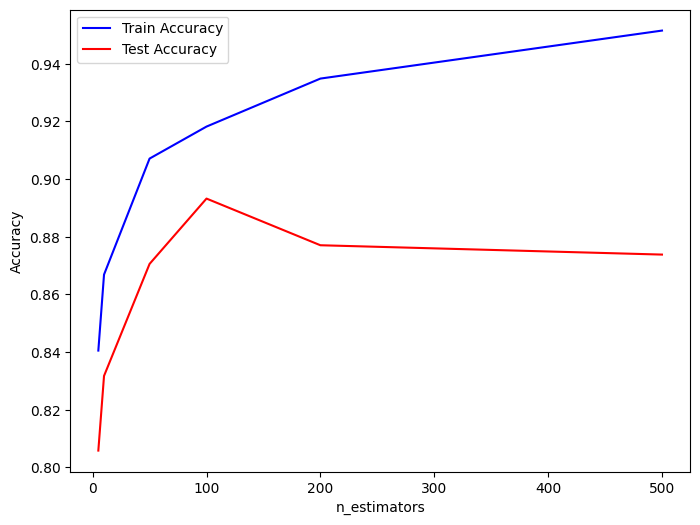

In [487]:
run_boosting()

##### Insights

It is Clear that:
- As no of estimators increases the training Accuracy increases because models focus more on hard examples misclassified from previous learners
- As no of estimators increases the testing Accuracy increases till 100 it begins to suffer from degradation this is due to more estimators means complex model over fitted on the training data 🙂🙂